In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix

df = pd.read_csv('online_shoppers_intention.csv')

variaveis = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'Month', 'SpecialDay', 'Weekend']

# Show this dataframe
new_df = df[variaveis].copy()

new_df = pd.get_dummies(new_df.dropna())

vars_cat = new_df.select_dtypes(exclude=["int64", "float64"])
cat_mask = [True if x in vars_cat.columns else False for x in new_df.columns]

num_mask = np.invert(cat_mask)
padronizador = StandardScaler()
df_num = padronizador.fit_transform(new_df.loc[:, num_mask])
df_num = pd.DataFrame(df_num, index=new_df.index, columns=new_df.loc[:, num_mask].columns)

df_cat = new_df.loc[:, cat_mask]

df_num.index.name = 'id'
new_df.index.name = 'id'

merged_df = df_num.merge(df_cat, how='left', on="id")
merged_df

#####
distancia_gower = gower_matrix(merged_df, cat_features=cat_mask)
gdv = squareform(distancia_gower,force='tovector')
Z = linkage(gdv, method='complete')
Z_df = pd.DataFrame(Z,columns=['id1','id2','dist','n'])
Z_df.head()

# Colocar opções aqui pra escolher duas opções entre números de 2 a 10
grupos_3 = fcluster(Z, 3, criterion='maxclust')
grupos_4 = fcluster(Z, 4, criterion='maxclust')
grupos_5 = fcluster(Z, 5, criterion='maxclust')
grupos_6 = fcluster(Z, 6, criterion='maxclust')
grupos_7 = fcluster(Z, 7, criterion='maxclust')
grupos_8 = fcluster(Z, 8, criterion='maxclust')
grupos_9 = fcluster(Z, 9, criterion='maxclust')

df['3_grupos'] = grupos_3
df['4_grupos'] = grupos_4
df['5_grupos'] = grupos_5
df['6_grupos'] = grupos_6
df['7_grupos'] = grupos_7
df['8_grupos'] = grupos_8
df['9_grupos'] = grupos_9

df

# Exportar base de dados


# fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 30))
# grupos = ["3_grupos", "4_grupos"]
# for i in range(12):
#     sns.boxplot(data=df, ax=axes[i//2][i%2], y=grupos[i%2], x=variaveis[i//2], orient='h')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType,Weekend,Revenue,3_grupos,4_grupos,5_grupos,6_grupos,7_grupos,8_grupos,9_grupos
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,Returning_Visitor,False,False,2,2,2,2,2,2,3
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,Returning_Visitor,False,False,2,2,2,2,2,2,3
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,Returning_Visitor,False,False,2,2,2,2,2,2,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,Returning_Visitor,False,False,2,2,2,2,2,2,3
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,Returning_Visitor,True,False,2,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,Returning_Visitor,True,False,3,3,3,4,4,4,5
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,Returning_Visitor,True,False,3,4,5,6,7,8,9
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,Returning_Visitor,True,False,3,4,5,6,7,8,9
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,Returning_Visitor,False,False,3,4,5,6,7,8,9


In [173]:
df[['PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']]

,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...
12325,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [164]:
pd.crosstab(df['Weekend'], df['3_grupos'])


3_grupos,1,2,3
Weekend,,,
False,2,2805,6655
True,1,742,2125


In [165]:
pd.crosstab(df['Weekend'], df['5_grupos'])

5_grupos,1,2,3,4,5
Weekend,,,,,
False,2,2805,4111,337,2207
True,1,742,1238,96,791


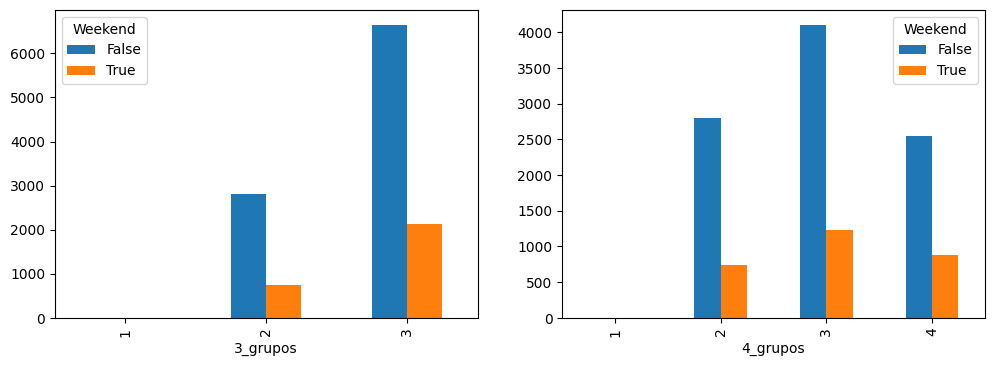

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

grupos = ["3_grupos", "4_grupos"]
for i in range(2):
    df.groupby([grupos[i], 'Weekend'])['Weekend'].count().unstack()#.plot.bar(ax=axes[i])
    
    